#### Syntetic Data Cleaning

**Name:** Adiel Nefthali Delgado Silva


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Read Dataset

In [ ]:
#Define our Dataset Using the Synthetic Data...csv
df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")

#### Exploratory Data Analysis

In [ ]:
#Info about our Dataset, its columns, type of data save on each feature and more
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         103 non-null    float64
 1   Income      103 non-null    float64
 2   Gender      84 non-null     object 
 3   Registered  103 non-null    float64
 4   City        103 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


In [ ]:
#It describe the statistics that our dataset has
df.describe()

,Age,Income,Registered
count,103.000000,103.000000,103.000000
mean,29.573987,51079.867179,0.504854
std,13.137300,21167.304578,0.502421
min,-5.000000,-1000.000000,0.000000
25%,23.988273,37726.305475,0.000000
50%,28.843517,51028.444622,1.000000
75%,34.967142,58315.989946,1.000000
max,120.000000,200000.000000,1.000000


In [ ]:
#Show the first 5 rows of the Dataset
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Registered'}>, <Axes: >]], dtype=object)

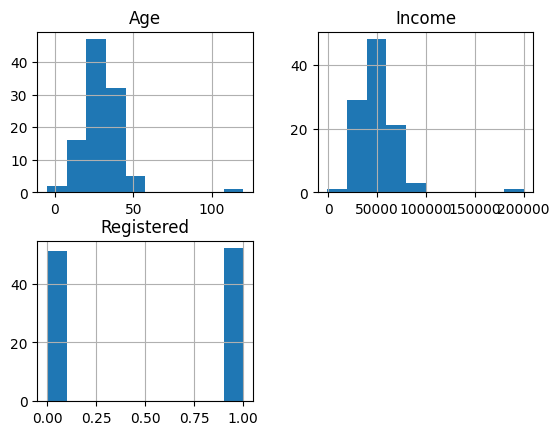

In [ ]:
#Show a histogram of the Dataset, that describes in a chart how the values of all INT columns has in each
#instance
df.hist()

### ^
#### As we can see above in the histogram, we have a few outliers in the Age & Income Feature than we need to clean up, in order to have a clean DataSet

In [ ]:
#Show the quantity of instances that the Dataset has
df.shape

(104, 5)

#### Data Cleaning

#### Before get rid of the outliers, the dataset needs to havo no Null values on it(In case it does have Null values of course)

In [ ]:
#Show the quantity of Null or Empty values that the Dataset has, in this case we can figure it out that the gender feature has 20 null values.
df.isnull().sum()


Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64

In [12]:
#With those values that are Null, they need to be replaced or in this case deleted, in order to have a better Dataset to use.
df = df.dropna()
df.isnull().sum()

Age           0
Income        0
Gender        0
Registered    0
City          0
dtype: int64

#### The Age feature will be the first to be clean out

In [ ]:
#First the age values need to be round, in order to make groups of age, avoiding 31.5 & 31.6 to be different values
df['Age'] = df['Age'].round(0)
df["Age"].value_counts()

Age
25.0    7
33.0    5
28.0    5
31.0    4
38.0    4
27.0    4
45.0    4
18.0    3
32.0    3
23.0    3
40.0    3
34.0    3
29.0    3
35.0    2
36.0    2
46.0    2
24.0    2
22.0    2
39.0    2
19.0    2
30.0    2
15.0    2
26.0    2
13.0    1
20.0    1
16.0    1
11.0    1
49.0    1
37.0    1
10.0    1
41.0    1
44.0    1
4.0     1
Name: count, dtype: int64

<Axes: >

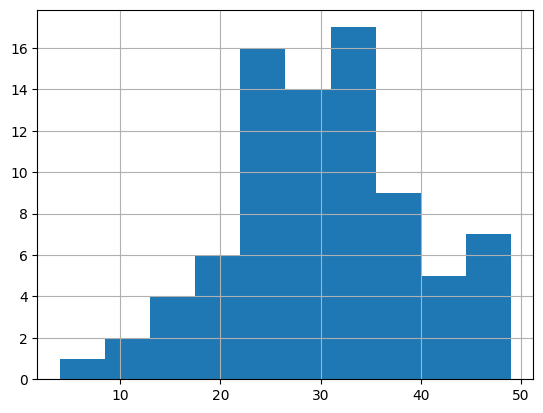

In [ ]:
#Now it is obvious that we are getting some information of people, but how is posible to a person under 16 to have any income?
#Then we will delete those instances in order to have a "realistic Dataframe haha"
df["Age"].hist()

<Axes: >

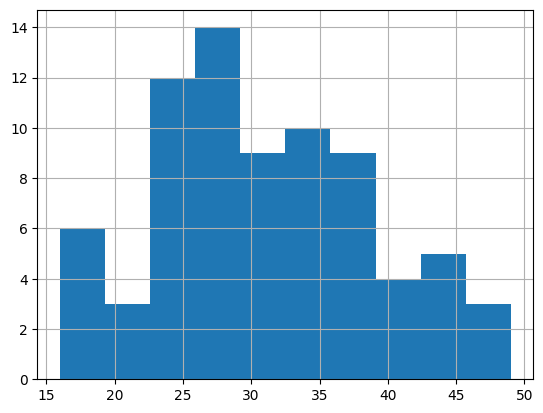

In [ ]:
#Modifying the dataset
df["Age"] = df["Age"][((df["Age"] >= 16) & (df["Age"] <= 50))]
df["Age"].hist()

In [ ]:
df.shape

#### Variable Tranformations
